In [5]:
import pandas as pd
import numpy as np
#uploading the dataset of our project using pandas package - Sentiment Analysis of Legal Texts
df=pd.read_excel("embeddingsdata.xlsx")
#data cleaning of the dataset
#removing all the missing values in the data set
missing_values=["n/a", "na", "--","?"]
#updating the data set
df=pd.read_excel("embeddingsdata.xlsx",na_values = missing_values)
df

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767,Label
0,0.009625,-0.029216,0.027109,0.023631,-0.004972,0.031757,-0.045125,0.044483,0.019400,-0.017189,...,-0.001972,-0.008154,-0.056139,0.009890,0.042366,0.040134,0.009304,-0.016137,-0.009309,0
1,-0.007535,-0.039844,0.030167,0.031224,0.004742,0.028289,-0.068723,0.039153,0.019596,-0.027138,...,0.008613,-0.006578,-0.034220,0.027574,0.045456,0.027402,0.017837,-0.035009,-0.010062,0
2,0.022408,-0.030840,0.032328,0.046965,0.007798,0.025860,-0.065093,0.035118,0.035359,-0.029205,...,0.020413,-0.034288,-0.050649,0.028408,0.040412,0.030261,0.003535,-0.034122,-0.017289,0
3,0.019677,-0.034055,0.012662,0.070387,-0.011170,0.017842,-0.050945,0.044878,0.034781,-0.025772,...,0.002963,-0.018754,-0.053278,0.033005,0.031635,0.022544,-0.011774,-0.011125,-0.017540,0
4,0.017678,-0.030323,0.012829,0.065267,-0.025161,0.011964,-0.050590,0.042820,0.029161,-0.015004,...,0.010192,-0.010147,-0.035857,0.021784,0.034621,0.017342,-0.009884,-0.010316,-0.029238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.019743,-0.071799,0.022546,0.049042,-0.005767,-0.016275,-0.037731,0.029718,0.009203,-0.030913,...,-0.001192,-0.026138,-0.056447,0.015818,0.045241,0.012620,-0.004837,-0.014540,-0.046791,2
896,0.000186,-0.027604,0.010623,0.038237,-0.026675,0.020215,-0.040816,0.032210,0.041016,-0.014836,...,0.015479,-0.003967,-0.037808,0.021234,0.031012,-0.010890,0.003081,-0.015145,-0.045444,0
897,0.018066,-0.032152,0.039794,0.047608,0.003898,0.024092,-0.056508,0.020527,0.031972,-0.026038,...,0.011308,-0.016882,-0.059904,0.009558,0.039976,0.029574,0.013737,-0.003724,-0.017324,2
898,-0.003492,-0.022739,0.021777,0.044054,-0.005621,0.013863,-0.079196,0.039150,0.004557,-0.015787,...,0.004005,-0.007196,-0.041652,0.020945,0.047604,0.019767,0.005806,-0.019280,-0.016415,5


In [8]:
from sklearn.model_selection import train_test_split
#X determines the feature vector set of the data 
X = df.drop('Label', axis=1)
#y determines the class level of the vectors in X
y = df['Label']
#dividing the dataset into train data and test in the ratio 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
import numpy as np

#Step activation function
def step_function(x):
    if x>=0:
        return 1
    else: 
        return 0

#Predict using the provided weights and step activation function
def predict(input_features):
    weights=np.array([10, 0.2, -0.75])  # Provided weights
    weighted_sum=np.dot(weights, input_features)
    return step_function(weighted_sum)

#Testing the perceptron for AND gate
#Test data for AND gate
X_test=np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    
# Testing the perceptron model and printing predictions
for i in range(len(X_test)):
    prediction=predict(np.insert(X_test[i], 0, 1))  # Insert bias (1) at the beginning
    print("Input: ", X_test[i], "Predicted: ",prediction)


Input:  [0 0] Predicted:  1
Input:  [0 1] Predicted:  1
Input:  [1 0] Predicted:  1
Input:  [1 1] Predicted:  1


Trained weights: [-0.27474095  0.22463621  0.13303046]


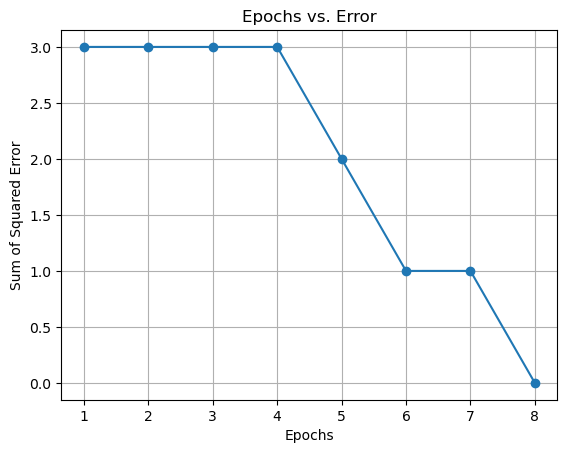

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Step activation function
def step_function(x):
    if x>=0:
        return 1
    else: 
        return 0

# Predict using the provided weights and step activation function
def predict(weights, input_features):
    weighted_sum=np.dot(weights, input_features)
    return step_function(weighted_sum)

# Perceptron function 
def train_perceptron(X, y, learning_rate=0.1, epochs=100):
    num_samples, num_features = X.shape
    weights=np.random.rand(num_features + 1)  # Initialize weights with random values
    X_with_bias=np.hstack((np.ones((num_samples, 1)), X))  # Add a bias (1) to each input
    
    error_values=[]  # List to store error values for each epoch
    
    for epoch in range(epochs):
        total_error = 0
        
        for i in range(num_samples):
            # Compute the predicted output
            prediction = predict(weights, X_with_bias[i])
            
            # Update the weights
            update = learning_rate * (y[i] - prediction)
            weights += update * X_with_bias[i]
            
            total_error += (y[i] - prediction) ** 2
        
        # Calculate the sum of squared errors for this epoch
        error_values.append(total_error)
        
        # Stop if all predictions are correct
        if total_error == 0:
            break
    
    return weights, error_values

# Test the perceptron for AND gate and plot error values
if __name__ == "__main__":
    # Sample training data for AND gate
    X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_train = np.array([0, 0, 0, 1])
    
    # Train the perceptron and get the trained weights and error values
    trained_weights, error_values = train_perceptron(X_train, y_train, learning_rate=0.05)
    print("Trained weights:", trained_weights)
    
    # Plot epochs against error values
    epochs = range(1, len(error_values) + 1)
    plt.plot(epochs, error_values, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Sum of Squared Error')
    plt.title('Epochs vs. Error')
    plt.grid(True)
    plt.show()
